# Regression Metrics

Follow _Introduction to Machine Learning_ [Chapter 5](https://github.com/amueller/introduction_to_ml_with_python/blob/master/05-model-evaluation-and-improvement.ipynb) **Section 5.3.4 Regression Metrics** (p.306)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mglearn

## Regression metrics

R-squared `sklearn.metrics.r2_score`
>It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

see [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) for more information.

$\frac{\sum(y - \bar{y})^2 - \sum(y - \hat{y})^2}{\sum(y - \bar{y})^2} = 1 -  \frac{\sum(y - \hat{y})^2}{\sum(y - \bar{y})^2}$

Mean-squared error `sklearn.metrics.mean_squared_error`

$\frac{1}{N} \sum (y - \hat{y})^2$

Root mean-squared error `sklearn.metrics.mean_squared_error(squared=False)`

$\sqrt{\frac{1}{N} \sum (y - \hat{y})^2}$

Mean absolute error `sklearn.metrics.mean_absolute_error`


$\frac{1}{N} \sum |y - \hat{y}|$

In [3]:
y = 10*np.random.rand(50)+2
y

array([11.18071523,  4.87457353,  4.97169064, 10.19462341,  7.40749046,
       11.16207415,  7.01232692,  9.47491803,  4.44219394,  6.36376195,
       10.21752182,  8.41045609,  5.59921338,  5.04833677, 11.6544544 ,
        4.81670125,  8.93513942,  5.01943577,  6.38439237,  7.05882304,
        3.05252069,  9.43122822,  4.27084256,  5.91119058,  5.15807094,
        3.43129533,  6.49062153,  2.89740003,  3.43827917,  8.17405102,
       10.97735303,  5.76088366,  4.46910613,  5.74171165, 10.42247   ,
        5.82158878,  8.41709877,  5.17200725, 11.16836554,  3.43027089,
        5.35375262,  3.68571126,  7.88573396,  7.12061943,  6.9041555 ,
        7.96647437, 11.37100562,  3.73743131,  8.05241517,  6.82824787])

In [4]:
y_pred = y + 2*np.random.rand(50)
y_pred[-1] = 1.6 * y[-1] #a slight outlier
y_pred

array([11.90410958,  4.96387606,  5.78924764, 10.21235103,  9.10042374,
       11.50089189,  8.42516503, 10.02830074,  4.74344235,  7.28073818,
       10.28809861, 10.21063111,  6.38661778,  6.18191096, 11.78127997,
        5.4013264 ,  8.99914563,  5.47784129,  7.19167258,  7.20945665,
        3.67243705,  9.75834453,  5.1548935 ,  7.39681049,  5.90862973,
        4.66635024,  6.70283158,  3.06741669,  4.17652395,  9.20012713,
       12.67554085,  6.73156418,  6.14092289,  7.4023254 , 11.56941538,
        7.02851833,  8.47177851,  6.35370978, 12.67796072,  3.99063682,
        6.38058931,  5.46208733,  8.25533721,  7.78360233,  8.34827549,
        8.41400201, 12.60094593,  5.59317603,  9.80428356, 10.92519659])

### Predicted vs actual plot

Combined with a line of unity to assess biases in predictons.

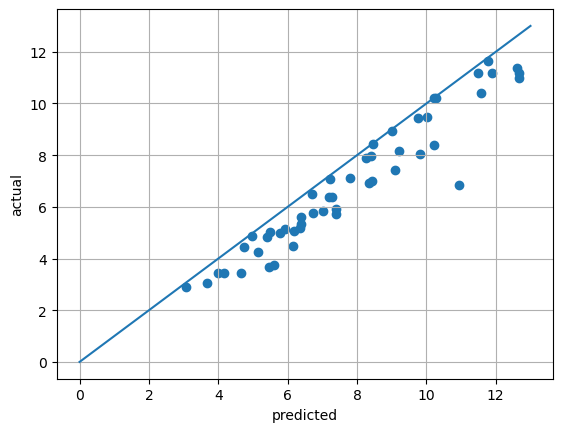

In [5]:
plt.scatter(y_pred, y)
plt.plot([0, 13], [0, 13])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.grid(True)

### Residual plot

Assess distribution of errors and dependency on magnitude of predicted value.

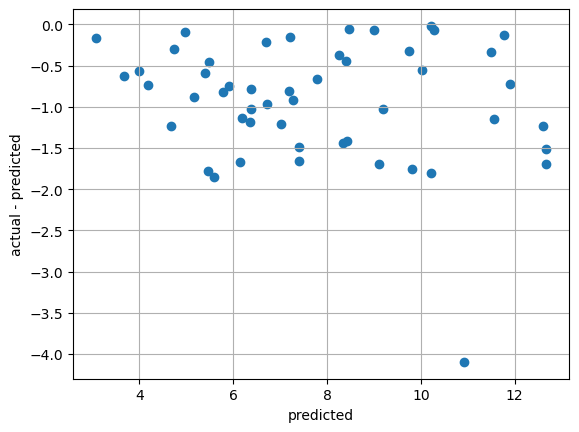

In [6]:
plt.scatter(y_pred, y-y_pred)
plt.xlabel('predicted')
plt.ylabel('actual - predicted')
plt.grid(True)

In [7]:
# Calculate R2 manually
1 - sum((y-y_pred)**2)/sum((y-y.mean())**2)

0.781450245313025

In [8]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.7814502453130249

In [9]:
# Calculate mse manually
sum((y-y_pred)**2) / len(y)

1.3815553771528377

In [10]:
from sklearn.metrics import mean_squared_error as mse
mse(y, y_pred)

1.381555377152838

In [11]:
# Calculate rms manually
np.sqrt(sum((y-y_pred)**2) / len(y))

1.175395838495627

In [12]:
mse(y, y_pred, squared=False)

1.175395838495627

In [13]:
# Calculate mae manually
sum(np.abs(y-y_pred)) / len(y)

0.9324003062058748

In [14]:
from sklearn.metrics import mean_absolute_error as mae
mae(y, y_pred)

0.9324003062058747

## Negative $R^2$?

In [15]:
x = np.linspace(0, 10, 50)
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [16]:
np.random.seed(345)
y = -0.1*x**2+np.random.randn(50)+8
y

array([ 9.46924823,  6.84569076, 10.50256581,  7.88003797,  7.8997602 ,
        6.25922111,  7.43796999,  9.58086739,  7.77582735,  7.04290855,
        6.59181629,  7.63251063,  8.05693087,  6.79971652,  6.951097  ,
        7.4427832 ,  7.46915178,  5.60221996,  5.13612727,  6.61246535,
        6.59305291,  7.2294732 ,  5.54417131,  3.64972928,  4.88234632,
        4.94052172,  4.06125135,  4.32530868,  4.32878758,  4.89270049,
        3.71259272,  3.38735709,  4.12353015,  3.60141911,  3.04174249,
        3.07343655,  2.56404523,  3.52795518,  1.18175509,  1.22677715,
        1.70050085,  0.49168713, -1.27354158, -0.30594167, -1.64670799,
       -0.9954155 , -0.16744344, -0.87718239, -1.81255468, -2.80012579])

Text(0, 0.5, 'target')

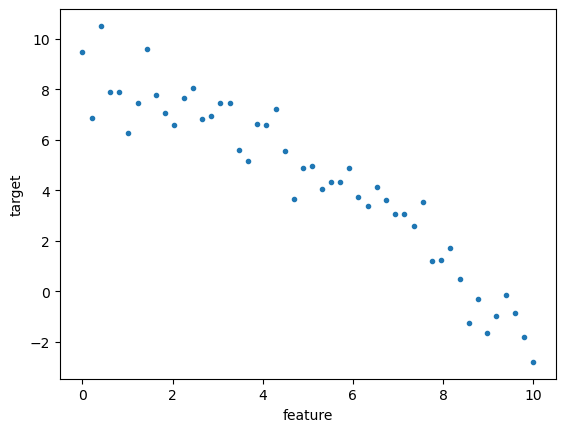

In [17]:
plt.plot(x, y, '.');
plt.xlabel('feature')
plt.ylabel('target')

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression(fit_intercept=False)
model.fit(x[:,None],y).score(x[:,None],y)

-1.3388646728073006

Text(0, 0.5, 'target')

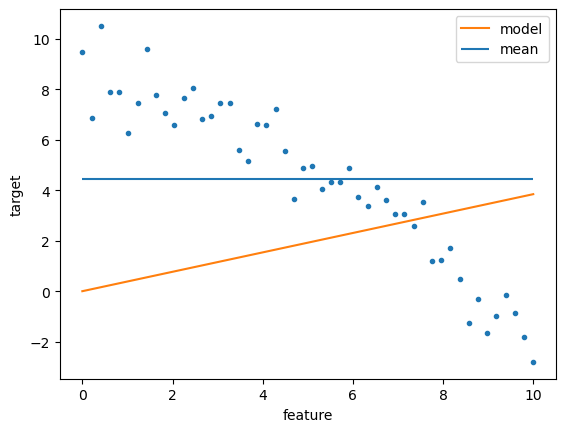

In [20]:
xline = np.linspace(0, 10, 20)
y_pred = model.predict(xline[:,None])

plt.plot(x, y, '.');
plt.plot(xline, y_pred, label='model');
plt.hlines(y=y.mean(), xmin=0, xmax=10, label='mean')
plt.legend()
plt.xlabel('feature')
plt.ylabel('target')

Why do we get a negative $R^2$?

It is possible to get a negative $R^2$ when the model performs worse than the constant-mean predictor

$R^2 = 1 -  \frac{\sum(y - \hat{y})^2}{\sum(y - \bar{y})^2}$

For a *bad* model, the numerator will be larger than the denominator, making the value negative.

For linear regression it can happen when no intercept is fitted.

See:

https://stackoverflow.com/questions/30507245/negative-r2-on-training-data-for-linear-regression

https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative